# Data Visualization and Scaling

This notebook covers **plotting** (Matplotlib, Pandas) and **preprocessing/scaling** (missing values, encoding, StandardScaler, train/test split). You'll use scatter plots, histograms, and then clean and scale the same data for ML-style workflows. Beginners get step-by-step plots and scaling; engineers get the same visualize-then-scale flow used in real pipelines.

> **If you have not already gone through the [preprocessing notebook](data-preprocessing.ipynb), you should start there.** It introduces DataFrame basics, missing values, categorical encoding, and scaling from the ground up. This notebook adds visualization and reinforces scaling with the same dataset.

```mermaid
flowchart LR
  A[Raw data] --> B[Visualize]
  B --> C[Clean & scale]
  C --> D[Train/test split]
  D --> E[Model-ready]
```

## Topics Covered
- Basic plotting: scatter, histogram, pandas `.plot()`
- Data visualization from DataFrames
- Preprocessing: missing values, categorical encoding, feature scaling
- Train/test split for modeling

Slides: https://github.com/adzuci/ai-fundamentals/blob/main/class-2-machine-learning-basics/Machine%20Learning.pdf

## Run in the browser (no local setup)

**Note:** These notebooks have been tested on **Python 3.10** and **Python 3.12**. Colab currently defaults to 3.12.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adzuci/ai-fundamentals/blob/main/class-2-machine-learning-basics/scaling-data.ipynb)

In [1]:
# Concept: environment check and imports
import platform

print("Python:", platform.python_version())
print("OS:", platform.system(), platform.release())

# Core data libraries for this class
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.model_selection import train_test_split

    print("NumPy:", np.__version__)
    print("Pandas:", pd.__version__)
    sample = pd.DataFrame({"x": [1, 2, 3], "y": [10, 20, 30]})
    print(sample)
except ModuleNotFoundError as exc:
    print("❌ Missing dependency:", exc)
    print("\n📦 To install missing packages:")
    print("   Local: python -m pip install numpy pandas scikit-learn matplotlib")
    print("   Colab/Jupyter: Uncomment and run the cell above: !pip install numpy pandas scikit-learn matplotlib")
    print("\n💡 Note: Google Colab usually has these pre-installed.")
    raise

Python: 3.10.14
OS: Darwin 25.2.0
NumPy: 2.2.6
Pandas: 2.3.3
   x   y
0  1  10
1  2  20
2  3  30


In [2]:
# Concept: create a small dataset
mydata = {
    "Age": [30, 25, np.nan, 40, 35],
    "Salary": [45000, 40000, 50000, np.nan, 65000],
    "City": ["Mumbai", "Pune", "Mumbai", "Delhi", "Pune"],
    "Purchased": ["Yes", "No", "Yes", "Yes", "No"],
}

In [3]:
# Concept: basic DataFrame operations
df = pd.DataFrame(mydata)
print("Original DataFrame:")
print(df)
print("\nDataFrame info:")
print(df.info())

Original DataFrame:
    Age   Salary    City Purchased
0  30.0  45000.0  Mumbai       Yes
1  25.0  40000.0    Pune        No
2   NaN  50000.0  Mumbai       Yes
3  40.0      NaN   Delhi       Yes
4  35.0  65000.0    Pune        No

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        4 non-null      float64
 1   Salary     4 non-null      float64
 2   City       5 non-null      object 
 3   Purchased  5 non-null      object 
dtypes: float64(2), object(2)
memory usage: 288.0+ bytes
None


In [4]:
# Concept: preview rows
df.head()

,Age,Salary,City,Purchased
0,30.0,45000.0,Mumbai,Yes
1,25.0,40000.0,Pune,No
2,NaN,50000.0,Mumbai,Yes
3,40.0,NaN,Delhi,Yes
4,35.0,65000.0,Pune,No


### Visualization: histograms and scatter

First we visualize the numeric columns; then we'll preprocess and scale.

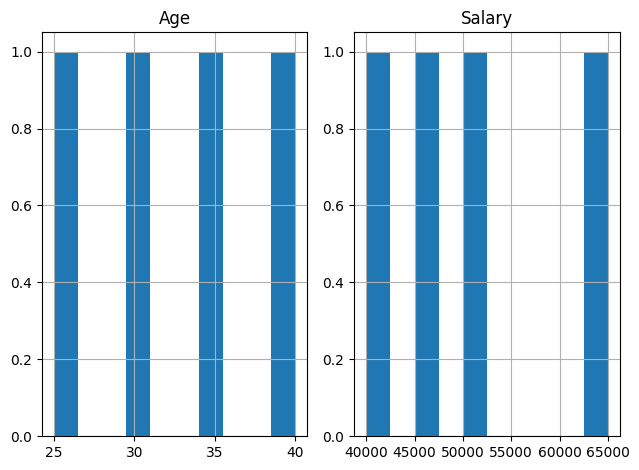

In [5]:
# Concept: visualising the distribution of numeric columns
df[["Age", "Salary"]].hist()
plt.tight_layout()
plt.show()

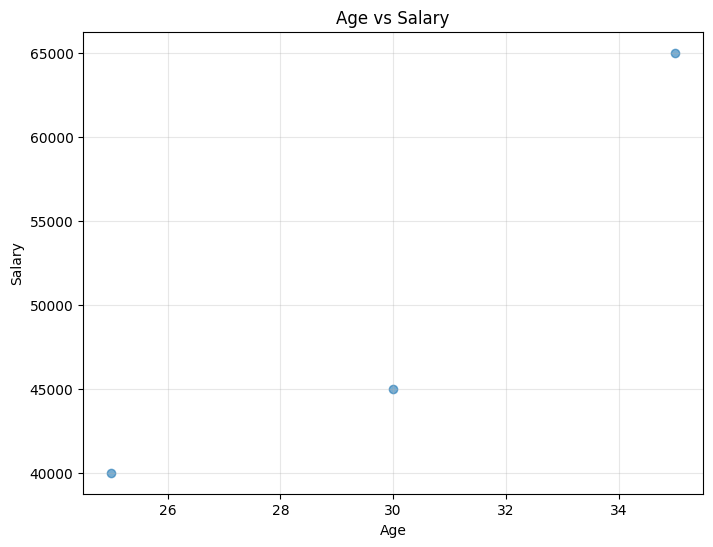

In [6]:
# Concept: scatter plot (matplotlib)
plt.figure(figsize=(8, 6))
plt.scatter(df["Age"], df["Salary"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.grid(True, alpha=0.3)
plt.show()

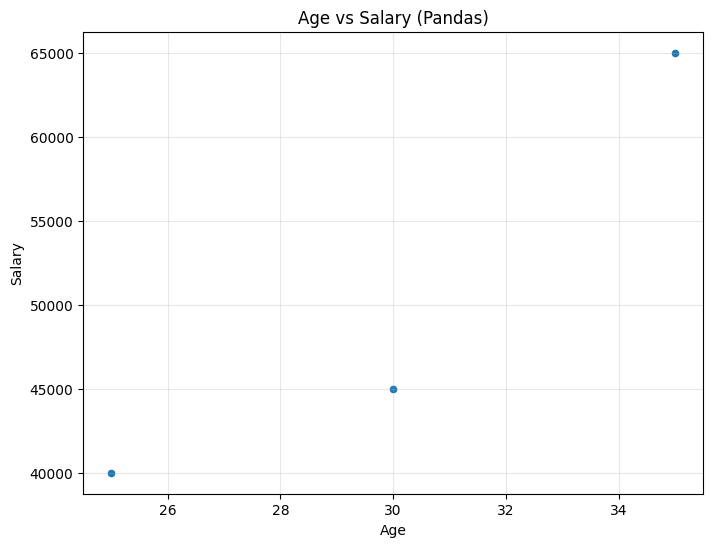

In [7]:
# Concept: scatter plot (pandas .plot())
df.plot(x="Age", y="Salary", kind="scatter", figsize=(8, 6))
plt.title("Age vs Salary (Pandas)")
plt.grid(True, alpha=0.3)
plt.show()

### Preprocessing and scaling

Handle missing values, encode categories, scale numerics, then split for train/test.

In [8]:
# Concept: data quality check (missing values)
df.isnull().sum()

Age          1
Salary       1
City         0
Purchased    0
dtype: int64

#### What are histograms good for?

**Histograms** show the **distribution** (spread and frequency) of a single numeric variable. They're useful for:

1. **Understanding data shape**: Is it symmetric (normal/bell-shaped), skewed left/right, or uniform?
2. **Finding outliers**: Very tall or very short bars at the edges indicate unusual values.
3. **Checking assumptions**: Many ML algorithms assume normal distributions; histograms help verify this.
4. **Comparing before/after**: See how scaling (e.g. StandardScaler) changes the distribution shape.

#### How to interpret a histogram:

- **X-axis**: The range of values (e.g., Age from 25 to 45, Salary from 30k to 70k)
- **Y-axis**: How many data points fall into each "bin" (range)
- **Peak(s)**: The tallest bar(s) show the most common values (the mode)
- **Spread**: Wide histograms = high variance; narrow = low variance
- **Skewness**: 
  - **Right-skewed** (tail to the right): Most values are low, a few high outliers
  - **Left-skewed** (tail to the left): Most values are high, a few low outliers
  - **Symmetric**: Values cluster around the center (like a bell curve)

In [9]:
# Concept: handle missing values (imputation)
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())
print("After imputation:")
print(df)

After imputation:
    Age   Salary    City Purchased
0  30.0  45000.0  Mumbai       Yes
1  25.0  40000.0    Pune        No
2  32.5  50000.0  Mumbai       Yes
3  40.0  50000.0   Delhi       Yes
4  35.0  65000.0    Pune        No


In [10]:
# Concept: encode categorical data (City)
le = LabelEncoder()
df["City"] = le.fit_transform(df["City"])
print("City mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

City mapping: {'Delhi': np.int64(0), 'Mumbai': np.int64(1), 'Pune': np.int64(2)}


In [11]:
# Concept: feature scaling (standardization)
scaler = StandardScaler()
df[["Age", "Salary"]] = scaler.fit_transform(df[["Age", "Salary"]])
print("DataFrame with scaled features:")
print(df)

DataFrame with scaled features:
   Age    Salary  City Purchased
0 -0.5 -0.597614     1       Yes
1 -1.5 -1.195229     2        No
2  0.0  0.000000     1       Yes
3  1.5  0.000000     0       Yes
4  0.5  1.792843     2        No


In [12]:
# Concept: train/test split
X = df[["Age", "Salary", "City"]].copy()
le_p = LabelEncoder()
y = pd.Series(le_p.fit_transform(df["Purchased"]), name="Purchased")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "| y_test shape:", y_test.shape)

X_train shape: (4, 3) | y_train shape: (4,)
X_test shape: (1, 3) | y_test shape: (1,)


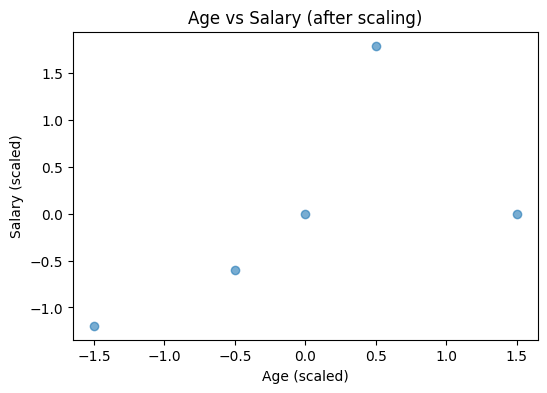

In [13]:
# (Optional) Scatter of scaled features
plt.figure(figsize=(6, 4))
plt.scatter(df["Age"], df["Salary"], alpha=0.6)
plt.xlabel("Age (scaled)")
plt.ylabel("Salary (scaled)")
plt.title("Age vs Salary (after scaling)")
plt.show()

---
## Try it on your own

**Visualization**
1. **Line plot**: Plot `Age` vs `Salary` as a line (`plt.plot(...)` or `df.plot(kind='line', ...)`). Compare with the scatter plot.
2. **Two plots**: Use `plt.subplots(1, 2)` to show a scatter (Age vs Salary) and a histogram of `Salary` side by side.

**Preprocessing**

3. **Missing values**: Add a row with `np.nan` in a numeric column; re-run from DataFrame creation and check `df.isnull().sum()` and imputation.

4. **Encode Purchased**: Use `LabelEncoder` on `Purchased` and show the label mapping.

5. **Train/test size**: Change `test_size=0.2` to `0.4` and compare `X_train`/`X_test` shapes.

6. **MinMaxScaler**: Use `MinMaxScaler()` on `df[['Age','Salary']]` and compare the value range with `StandardScaler`.